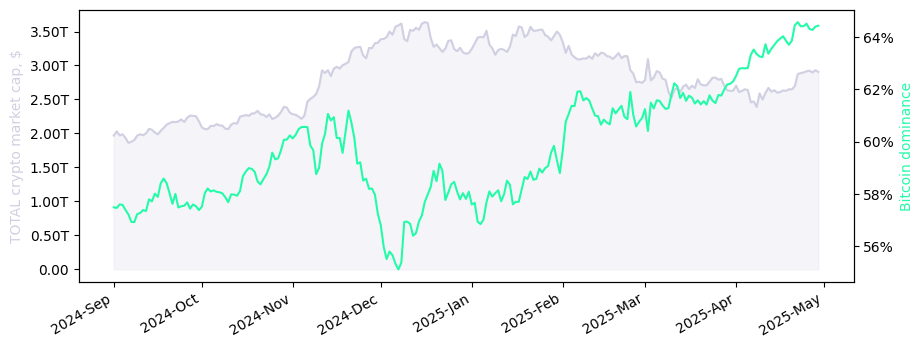

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date
import matplotlib.ticker as mticker


df = pd.read_csv('CRYPTOCAP_TOTAL, 1D 1.csv')
df['time'] = df['time'].apply(lambda x: datetime.fromtimestamp(x))

df = df[(df['time'] >= datetime.fromisoformat('2024-09-01')) & (df['time'] <= datetime.fromisoformat('2025-04-30'))]
x = df['time']
y1 = df['close']
y2 = df['BTC.D · CRYPTOCAP: close'].ffill()

fig, ax1 = plt.subplots(figsize=(10,4))

ax2 = ax1.twinx()
ax1.plot(x, y1, '-', color = (208/255, 208/255, 208/235), zorder = 10)
ax2.plot(x, y2, '-', color = (36/255, 251/255, 169/255),zorder = 1)
ax1.fill_between(x, y1, color = (208/255, 208/255, 208/235), alpha = 0.2)



ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
fig.autofmt_xdate()

ax1.set_ylabel('TOTAL crypto market cap, $', color= (208/255, 208/255, 208/235))
ax2.set_ylabel('Bitcoin dominance', color = (36/255, 251/255, 169/255))

# format number to a more readable form
def human_format(num):
    magnitude = 0
    while abs(num) >= 100:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'bn', 'T', 'TT'][magnitude])

ticks_loc = ax1.get_yticks().tolist();
ax1.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc));
ax1.set_yticklabels([human_format(x) for x in ticks_loc]);
ticks_loc = ax2.get_yticks().tolist();
ax2.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc));
ax2.set_yticklabels([f'{x:.0f}%' for x in ticks_loc]);